In [31]:
!pip install --upgrade category_encoders
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from category_encoders import BinaryEncoder



In [2]:
insurance_data = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Documents\\insurance.csv')
insurance_data.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# Determining the no. of records in our dataset
insurance_data.shape

(1338, 7)

In [4]:
# Previewing the top of our dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# Previewing the bottom of our dataset
insurance_data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
# Checking whether each column has an appropriate datatype 
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Check for duplicated rows
insurance_data.duplicated().any()

True

In [8]:
# Check the summary statistics
insurance_data.describe(include = "all")

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


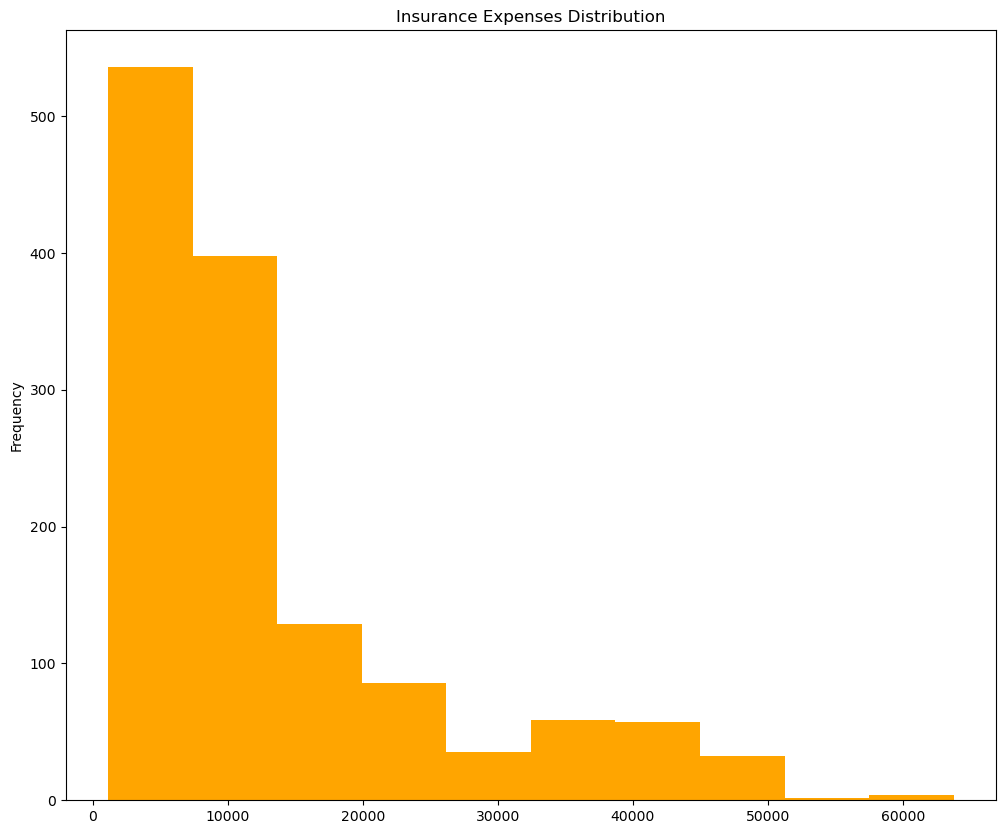

In [9]:
# Plotting insurance expenses distribution
plt.figure(figsize=(12,10))
plt.title("Insurance Expenses Distribution")
insurance_data['expenses'].plot(kind = "hist", color="orange");


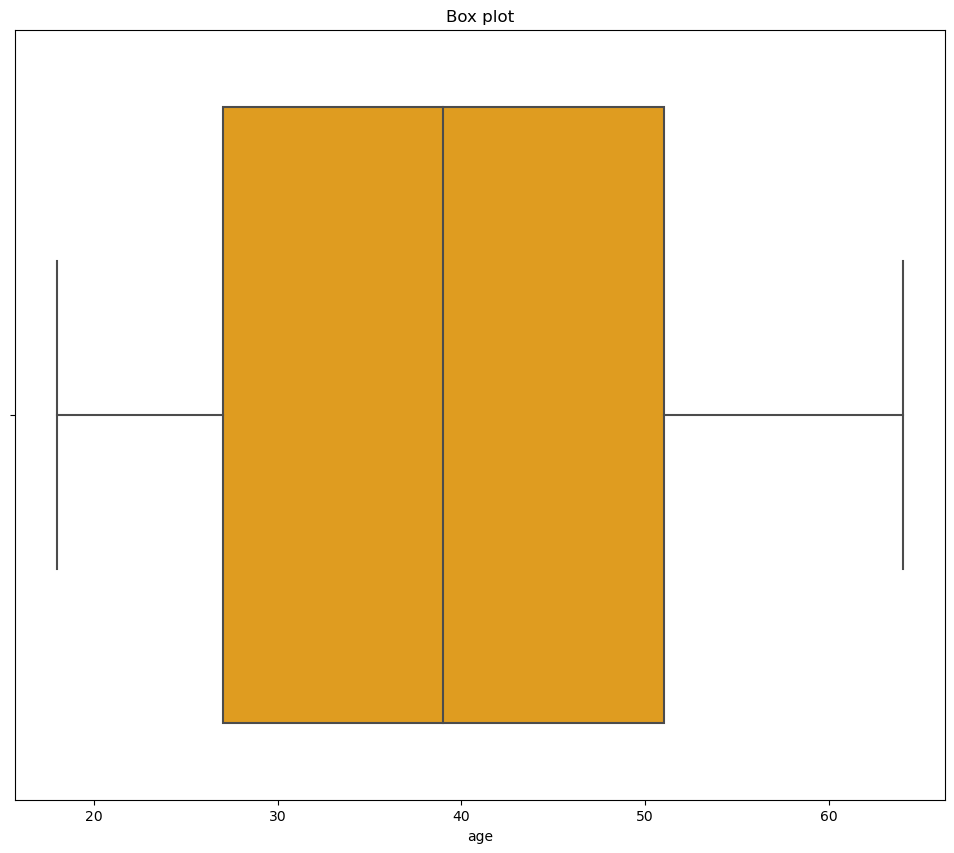

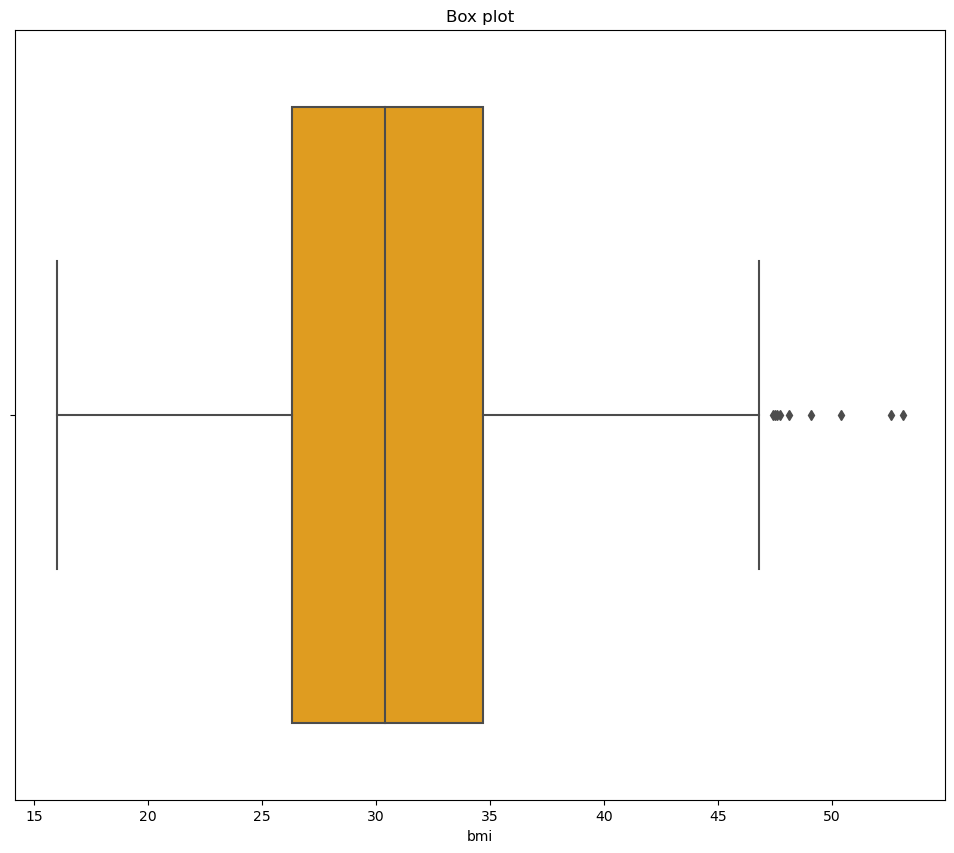

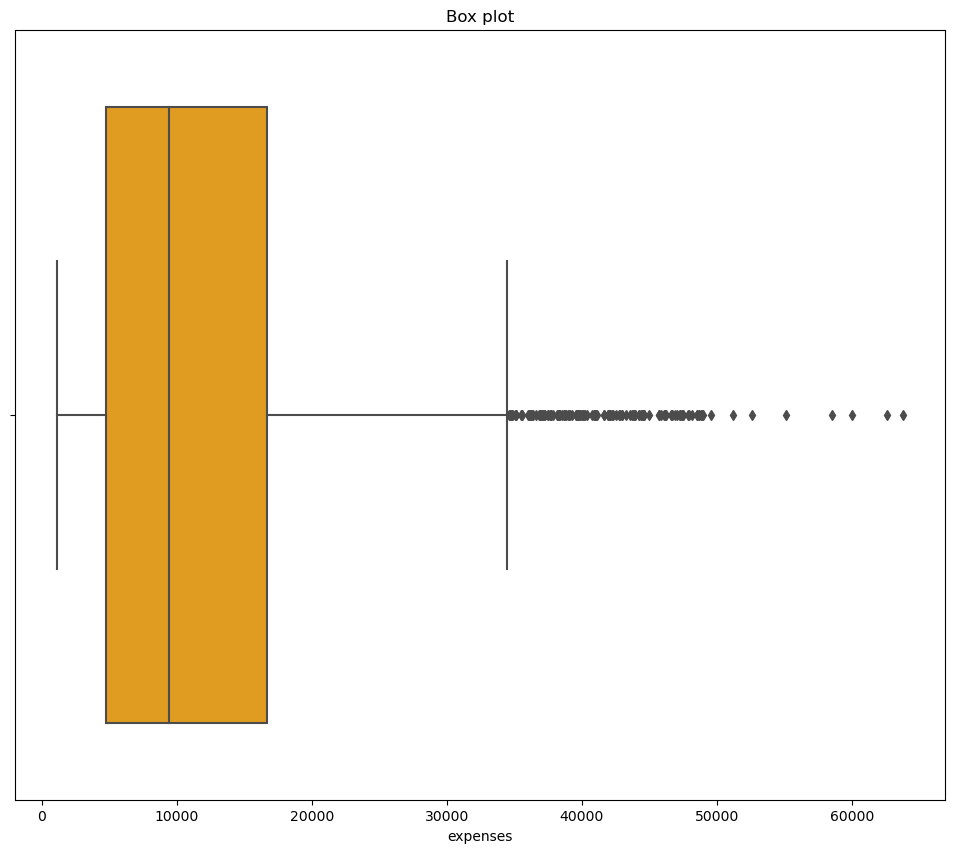

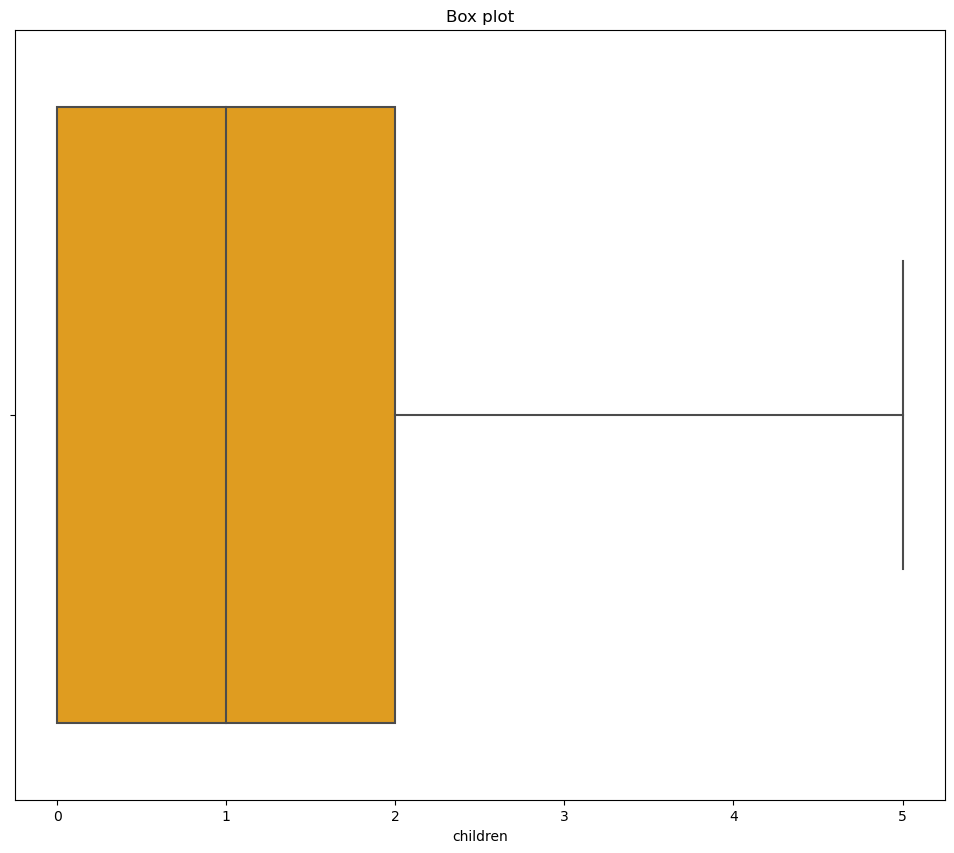

In [10]:
# Checking for outliers in all continuous variables
numeric_data = ['age','bmi','expenses','children']

for col in numeric_data:
    plt.figure(figsize=(12,10))
    sns.boxplot(x = insurance_data[col],color='orange')
    plt.title('Box plot')
    plt.show()

In [11]:
# Identifying the Duplicates
duplicated_value = insurance_data[insurance_data.duplicated(keep = False)]
duplicated_value

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [12]:
# Drop duplicated row
insurance_data.drop_duplicates(inplace = True)

# Confirm that duplicated row has been deleted
insurance_data.shape

(1337, 7)

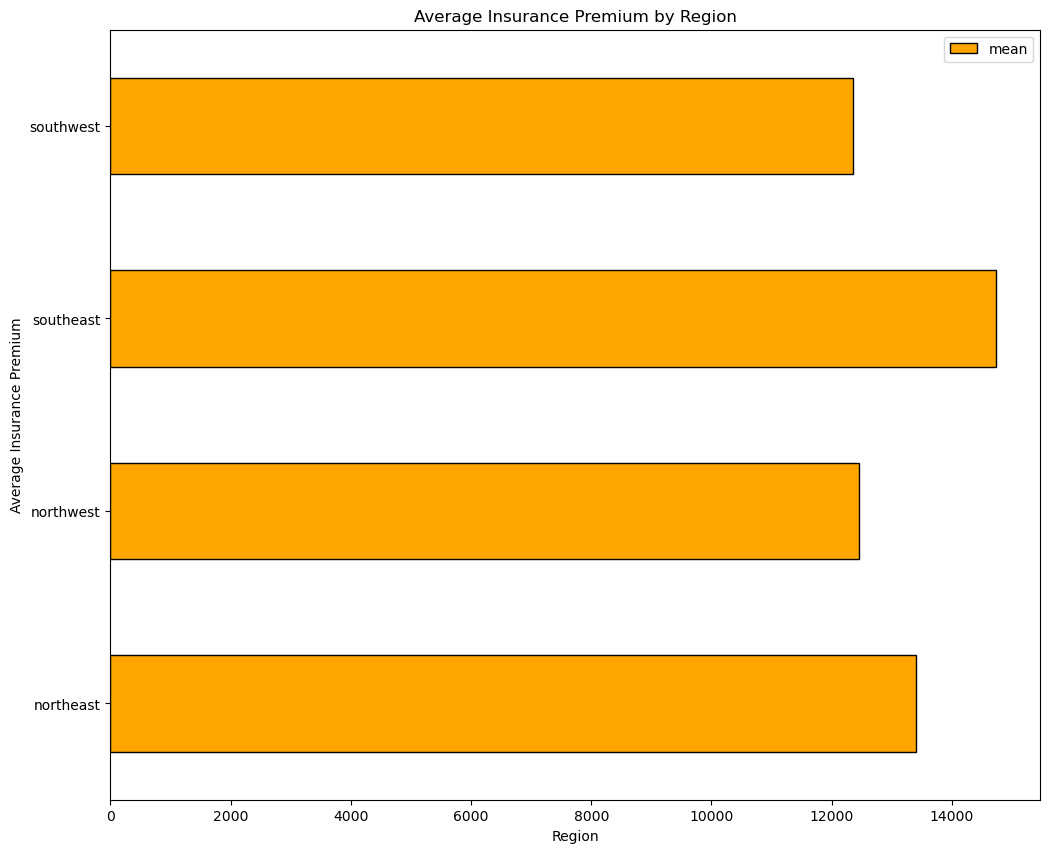

In [13]:
# Exploratory Data Analysis
#UNIVARIATE ANALYSIS

# Plotting average insurance premium by region
insurance_data.groupby('region')['expenses'].agg(['mean']).plot(kind='barh',
                                                                figsize=(12,10),
                                                                color='orange',
                                                                edgecolor="black")
plt.xlabel('Region')
plt.ylabel('Average Insurance Premium')
plt.title('Average Insurance Premium by Region');


In [14]:
#2.BIVARIANT ANALYSIS
# Checking the dataframe for smokers
smoker_df = insurance_data.loc[insurance_data['smoker'] == 'yes']
smoker_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
11,62,female,26.3,0,yes,southeast,27808.73
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

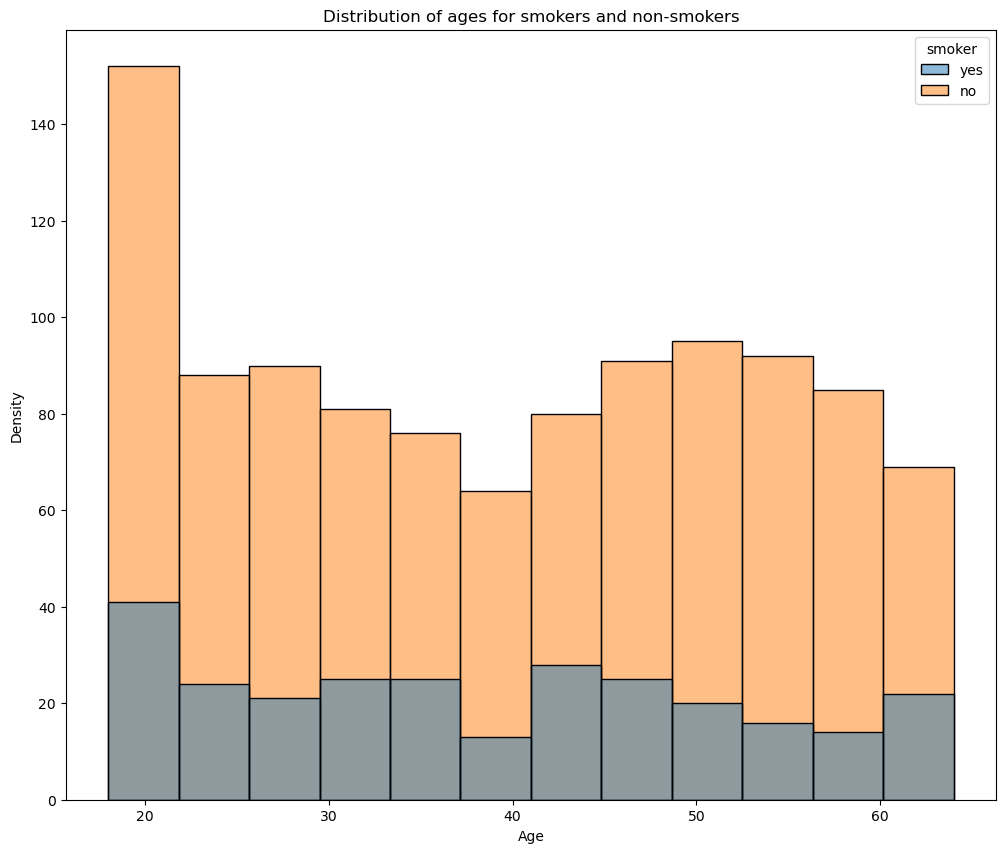

In [15]:
# Checking the age distribution for smokers and non-smokers
fig = plt.figure(figsize=(12,10))
sns.histplot(x='age', data=insurance_data, hue='smoker')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of ages for smokers and non-smokers')
plt.show();

In [16]:
# Crosstabulation of region and smoker
pd.crosstab(insurance_data['region'],insurance_data['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


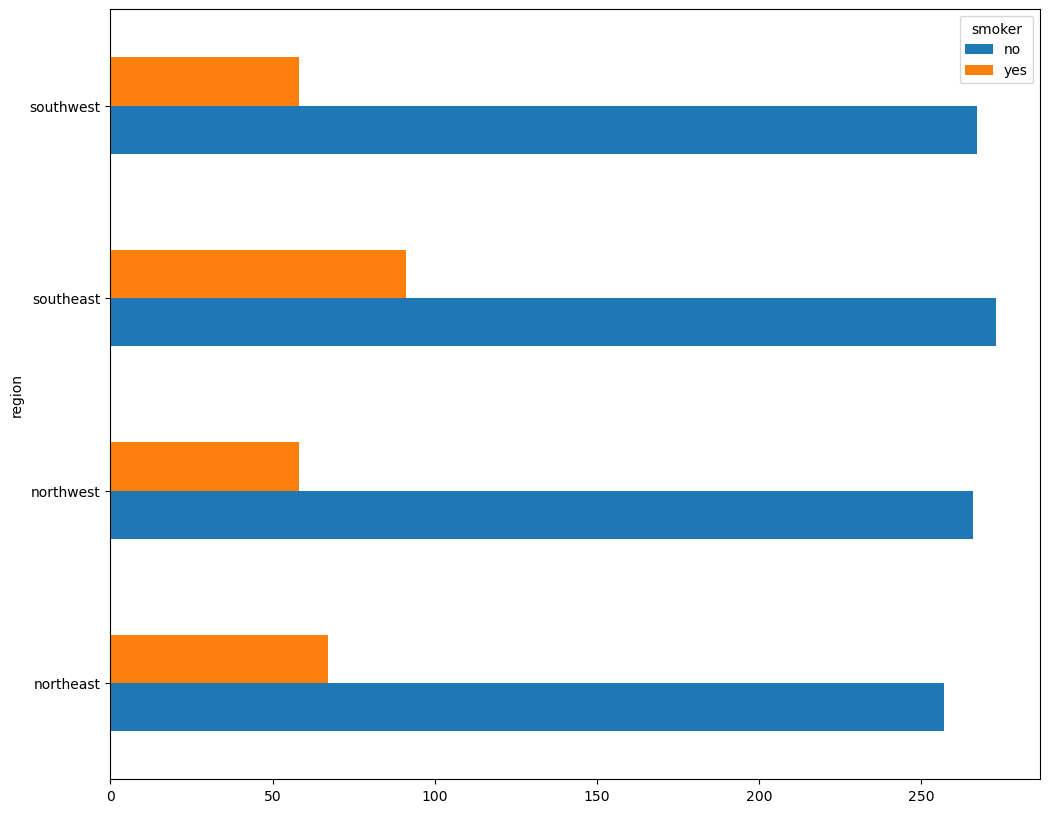

In [17]:
# Barplot showing smokers and non-smokers for different regions
pd.crosstab(insurance_data['region'],
            insurance_data['smoker']).plot(kind = 'barh',figsize=(12,10));

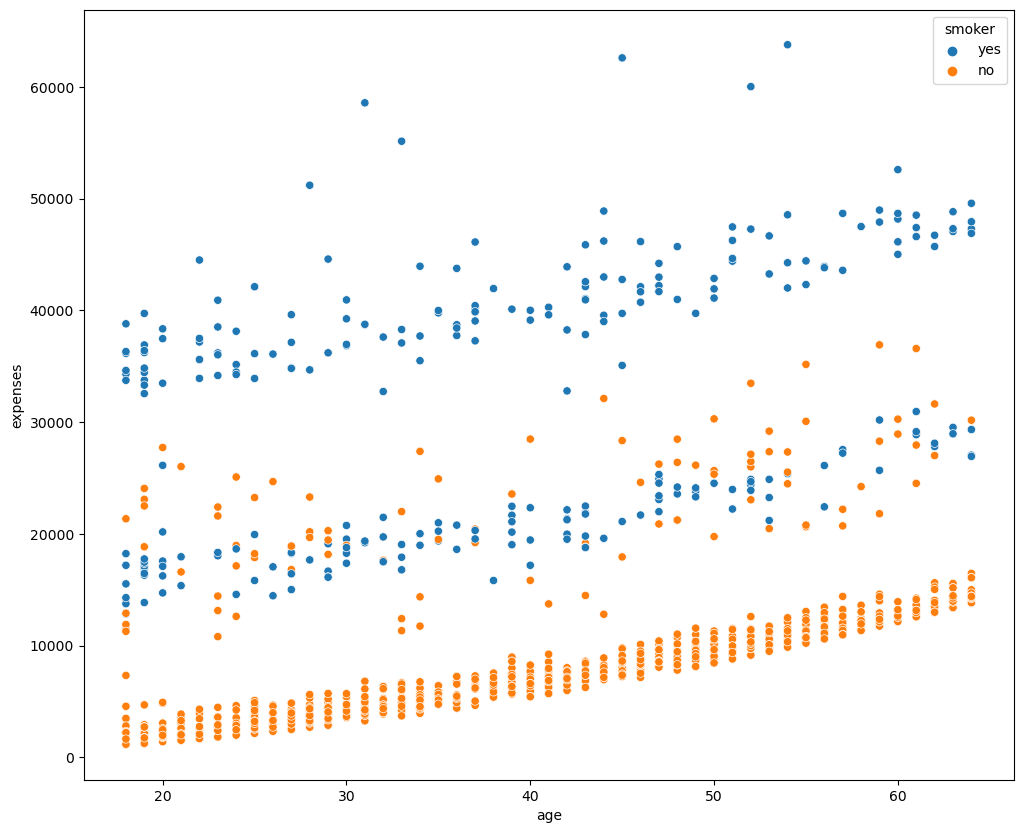

In [18]:
# Scatterplot of age and expenses with color providing insights on the variable smoker
plt.figure(figsize=(12,10))
sns.scatterplot(data = insurance_data,
                x = 'age',
                y= 'expenses',
                hue='smoker');

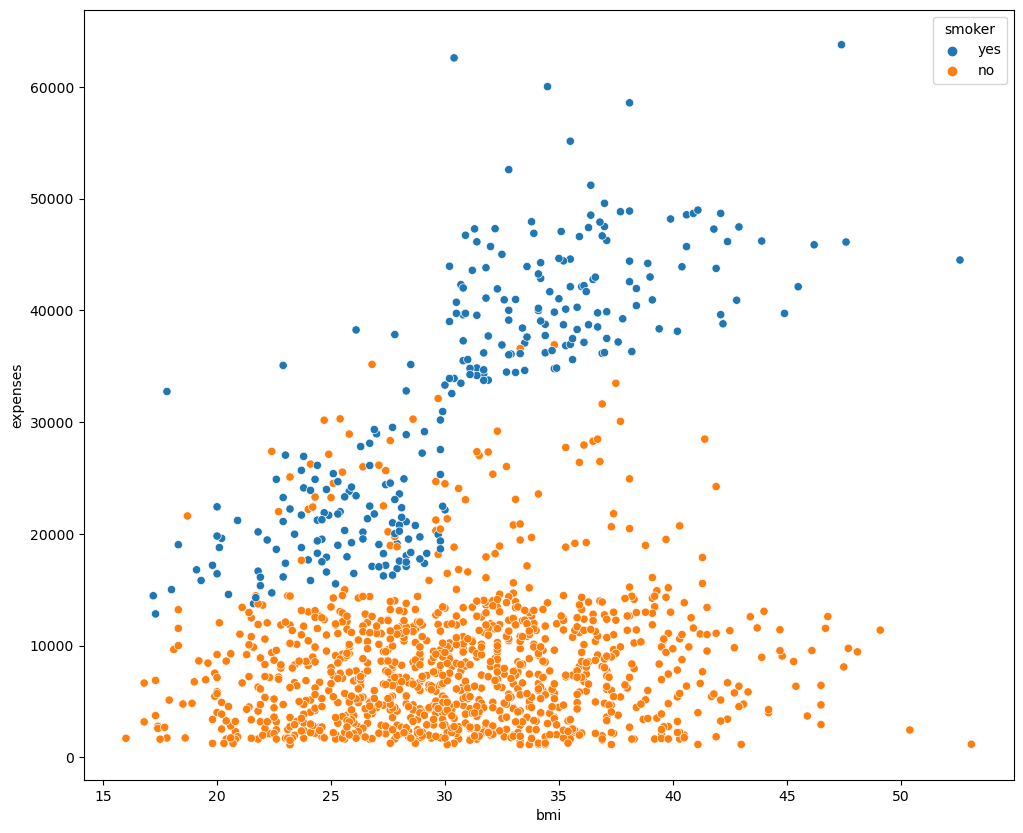

In [19]:
# Scatterplot of expenses and bmi with color providing insight on the variable smoker 
plt.figure(figsize=(12,10))
sns.scatterplot(data = insurance_data,
                x = 'bmi', 
                y= 'expenses',
                hue= 'smoker');

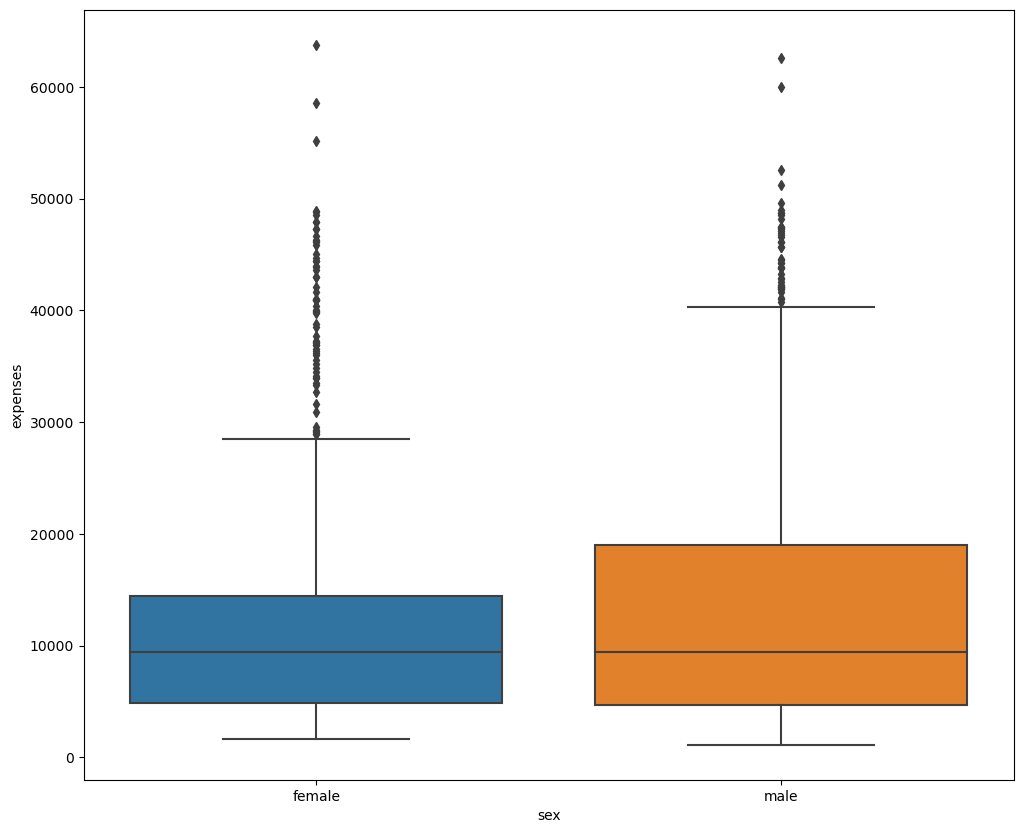

In [20]:
# Boxplots of sex against paid expenses
plt.figure(figsize=(12,10))
sns.boxplot(data = insurance_data, x='sex',y = 'expenses');


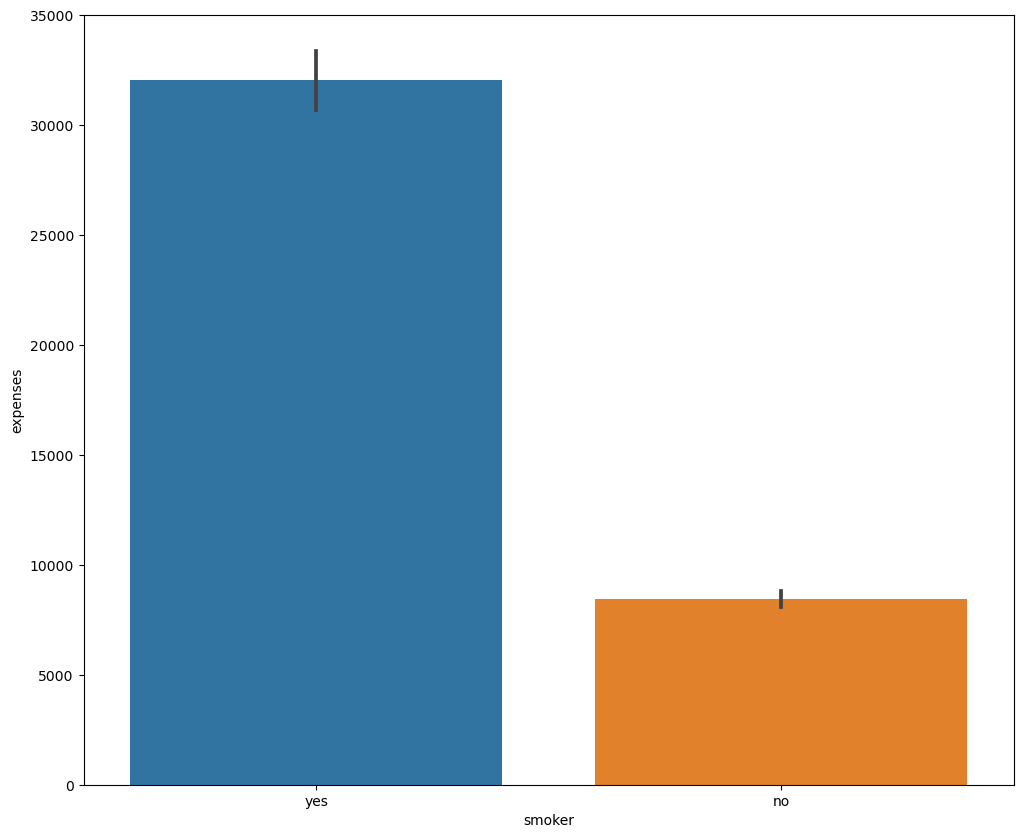

In [21]:
# Boxplot of Smoker agaisnt Expense
plt.figure(figsize=(12,10))
sns.barplot(data = insurance_data, x='smoker',y = 'expenses');

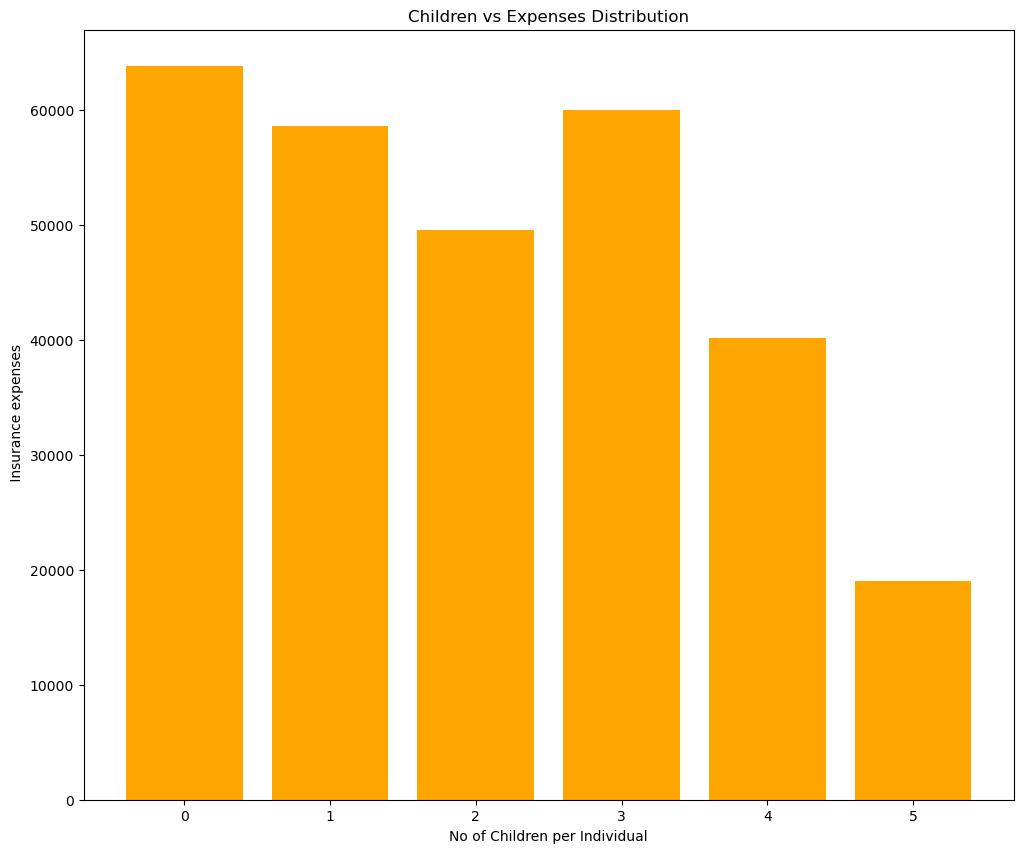

In [22]:
# Bargraph of Children against Expenses
plt.figure(figsize=(12,10))
plt.bar(insurance_data['children'],insurance_data['expenses'], color='orange')
plt.title('Children vs Expenses Distribution')
plt.xlabel('No of Children per Individual')
plt.ylabel(' Insurance expenses')
plt.show();

In [23]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [24]:
import pandas as pd
insurance_data = pd.get_dummies(insurance_data, columns=['sex'], drop_first=True)

In [25]:
print(insurance_data.dtypes)

age           int64
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
sex_male       bool
dtype: object


In [26]:
# Dropping non-numeric columns
insurance_data = insurance_data.select_dtypes(include=[np.number])

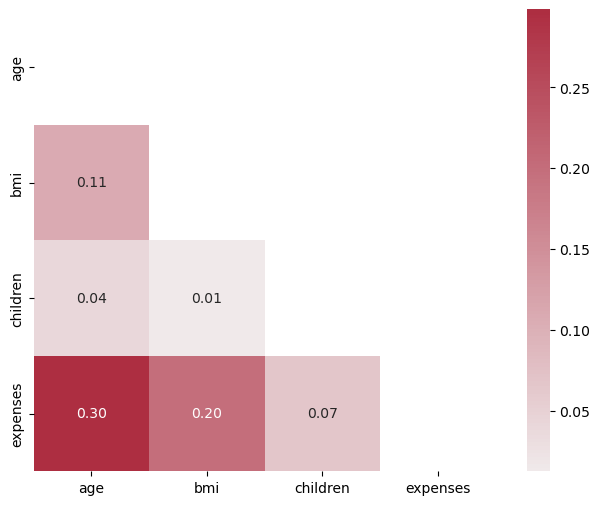

In [27]:
# Triangular correlation heatmap to check which predictors have the highest correlation with the target
# Create a mask
corr = insurance_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

In [28]:
print(smoker_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [29]:
# Creating a copy of the dataframe
insurance_data2 = smoker_df.copy()

In [30]:
# Encoding categorical variables in our dataset using binary encoding
encoder = BinaryEncoder(cols = ['sex','smoker','region'])
newdata = encoder.fit_transform(insurance_data2[['sex','smoker','region']])
insurance_data2 = pd.concat([insurance_data2,newdata], axis=1)

# Dropping extra columns from the encoded variables
insurance_data2 = insurance_data2.drop(['sex','smoker','region','sex_0','smoker_0','region_0'], axis=1)
insurance_data2.head(5)

,age,bmi,children,expenses,sex_1,region_1,region_2
0,19,27.9,0,16884.92,1,0,1
11,62,26.3,0,27808.73,1,1,0
14,27,42.1,0,39611.76,0,1,0
19,30,35.3,0,36837.47,0,0,1
23,34,31.9,1,37701.88,1,1,1
